In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import load.load_dataset as ds

from umap import UMAP
from sklearn.cluster import DBSCAN, HDBSCAN

import warnings
warnings.filterwarnings('ignore')

# Figure 3 : Robustness

In [2]:
ens_med = np.load(os.path.join(os.getcwd(), "results_medoid", "adult_model1", "test", "robustness_ensemble_medoid.npy"))
mean_med = np.load(os.path.join(os.getcwd(), "results_medoid", "adult_model1", "test", "robustness_mean_medoid.npy"))
ens_rand = np.load(os.path.join(os.getcwd(), "results_random", "adult_model1", "test", "robustness_ensemble_random.npy"))

In [3]:
print(ens_med.shape, mean_med.shape, ens_rand.shape)

(1000, 4) (1000, 4) (1000, 4)


In [4]:
ens_med[:,[0,1]] = ens_med[:,[1,0]]
mean_med[:,[0,1]] = mean_med[:,[1,0]]
ens_rand[:,[0,1]] = ens_rand[:,[1,0]]

2 #E0A458
1 #CC6677
0 #117733


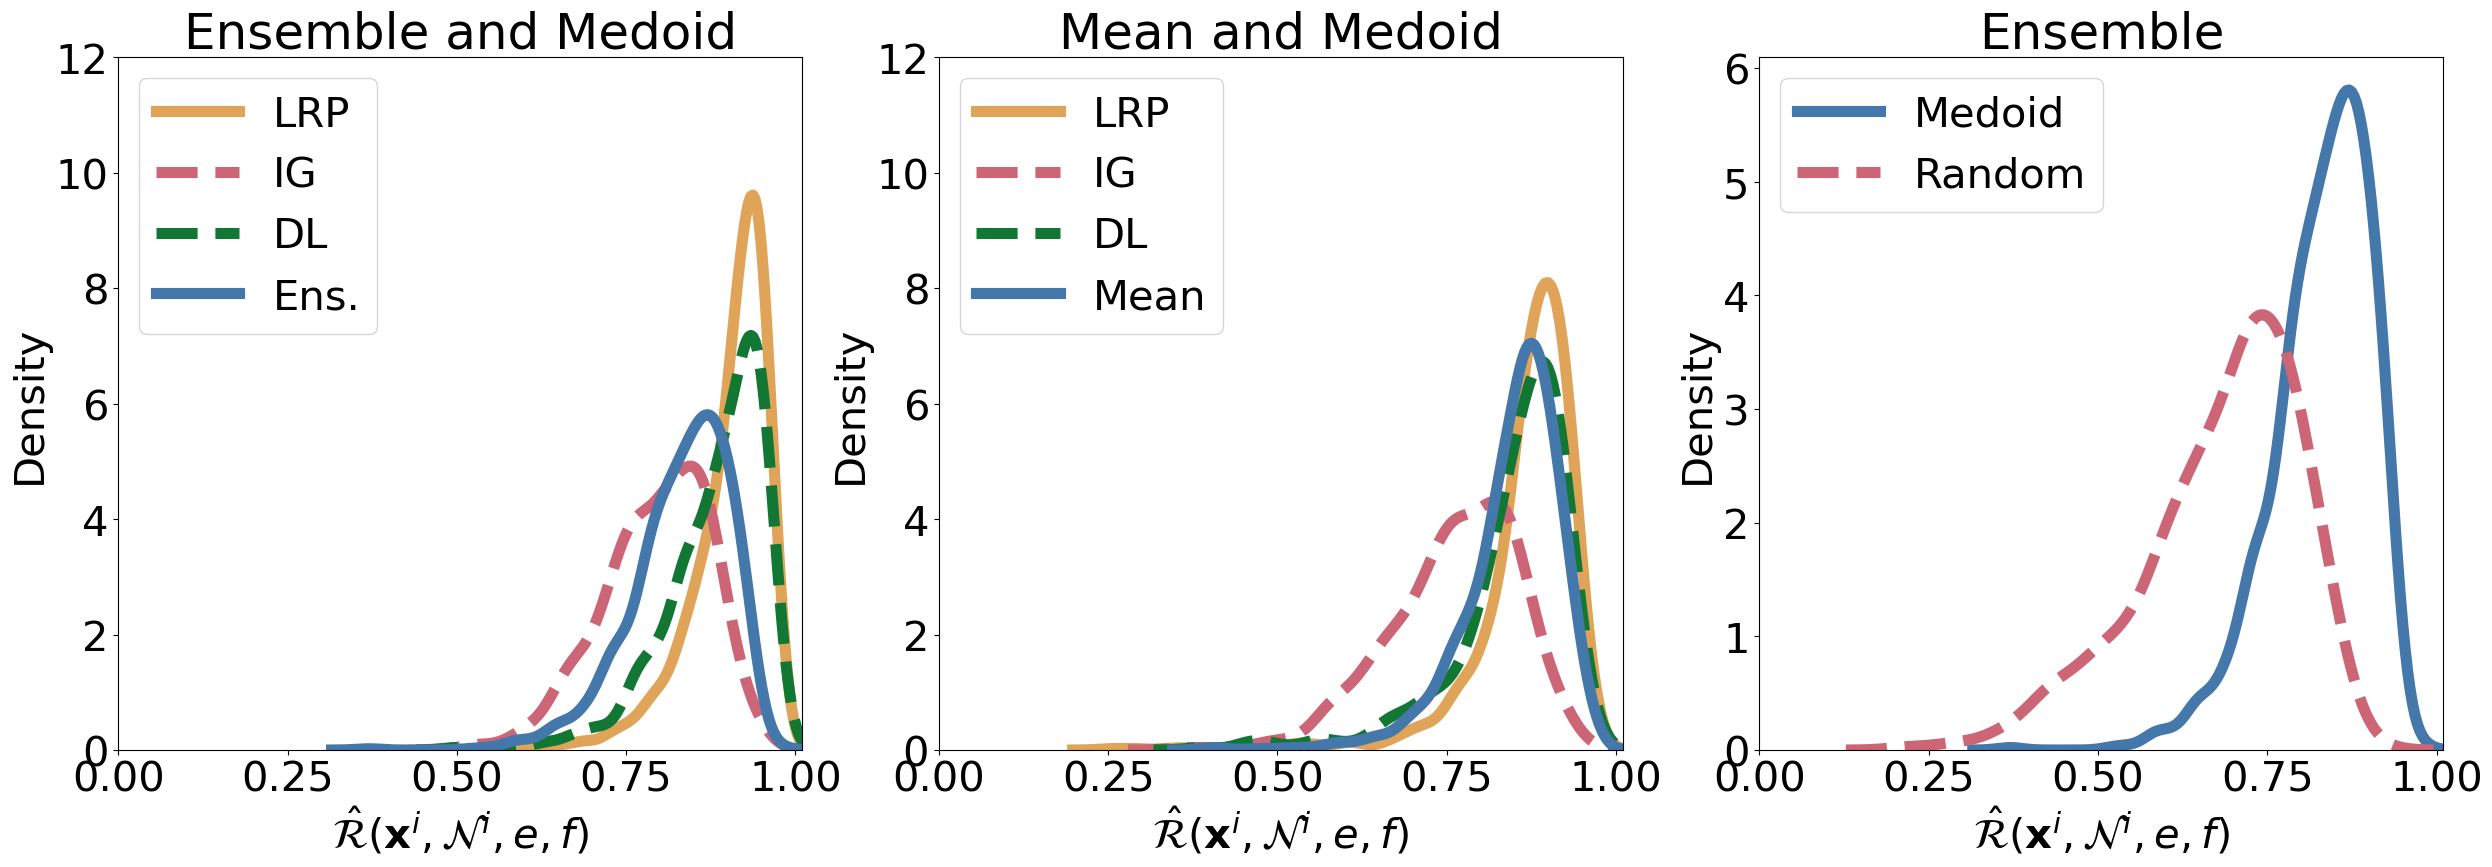

In [10]:
fig, ax = plt.subplots(1,3, figsize = (30,9))
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 30

method_label = ["DL", "IG", "LRP"]
cols = ['#117733','#CC6677','#E0A458', '#4477AA']
#cols = ['#7570B3',  '#1B9E77','#BFAE48',  '#D95F02']
line_style = ["--", "--", "-", "-"]
linewidth = 8

for i in range(3)[::-1]:
    print(i, cols[i])
    sns.distplot(ens_med[:,i], label=method_label[i], ax = ax[0], hist=False, kde_kws=dict(linewidth=linewidth, linestyle = line_style[i]), color = cols[i])
    sns.distplot(mean_med[:,i], label=method_label[i], ax = ax[1], hist=False, kde_kws=dict(linewidth=linewidth,linestyle = line_style[i]), color= cols[i])

sns.distplot(ens_med[:,3], label="Ens.", ax = ax[0],hist=False, kde_kws=dict(linewidth=linewidth, linestyle = line_style[3]), color=cols[3])
sns.distplot(mean_med[:,3], label="Mean", ax = ax[1],hist=False,  kde_kws=dict(linewidth=linewidth, linestyle = line_style[3]), color=cols[3])

sns.distplot(ens_med[:,3], label="Medoid", ax = ax[2],hist=False,  kde_kws=dict(linewidth=linewidth, linestyle = "-"), color = "#4477AA")
sns.distplot(ens_rand[:,3], label="Random", ax = ax[2],hist=False,  kde_kws=dict(linewidth=linewidth, linestyle = "--"), color = "#CC6677")

ax[0].set_title("Ensemble and Medoid")
ax[1].set_title("Mean and Medoid")
ax[2].set_title("Ensemble")

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim(0,1.01)
ax[1].set_xlim(0,1.01)
ax[2].set_xlim(0,1.01)


ax[0].set_xlabel("$\hat{\mathcal{R}}(\mathbf{x}^i, \mathcal{N}^{i}, e, f)$")
ax[1].set_xlabel("$\hat{\mathcal{R}}(\mathbf{x}^i, \mathcal{N}^{i}, e, f)$")
ax[2].set_xlabel("$\hat{\mathcal{R}}(\mathbf{x}^i, \mathcal{N}^{i}, e, f)$")

ax[0].set_ylim(0,12)
ax[1].set_ylim(0,12)

plt.show()

# Figure 4 : UMAP

In [13]:
dataset_name = "beans"

dataset = ds.Dataset(dataset_name)
feature_names, categorical_features, categorical_names, ordinal,discrete, encoder, num_features = dataset.info()
X_train_or, X_train, y_train = dataset.train()
X_val_or, X_val, y_val = dataset.validation()
X_test_or, X_test, y_test = dataset.test()

umap = UMAP(n_components=2)
X_beans = umap.fit_transform(X_val_or)

dbscan = HDBSCAN(min_cluster_size=100)
dbscan.fit(X_beans)
dbs_labels = dbscan.labels_
print(np.unique(dbs_labels))

col_base = []

rob_base = np.load(os.path.join(os.getcwd(), "results_medoid", f"{dataset_name}_model1", "validation", "robustness_ensemble_medoid.npy"))[:,3]

for cl_idx in np.unique(dbs_labels):
    tmp_nov = rob_base[dbs_labels==cl_idx]

    col_base.append(np.round(np.mean(tmp_nov),2))

col_base= np.array(col_base)
col_beans = col_base[dbs_labels]


[-1  0  1  2  3]


In [17]:
dataset_name = "adult"

dataset = ds.Dataset(dataset_name)
feature_names, categorical_features, categorical_names, ordinal,discrete, encoder, num_features = dataset.info()
X_train_or, X_train, y_train = dataset.train()
X_val_or, X_val, y_val = dataset.validation()
X_test_or, X_test, y_test = dataset.test()

umap = UMAP(n_components=2)
X_adult = umap.fit_transform(X_val_or)

dbscan = HDBSCAN(min_cluster_size=100)
dbscan.fit(X_adult)
dbs_labels = dbscan.labels_
print(np.unique(dbs_labels))

col_base = []

rob_base = np.load(os.path.join(os.getcwd(), "results_medoid", f"{dataset_name}_model1", "validation", "robustness_ensemble_medoid.npy"))[:,3]

for cl_idx in np.unique(dbs_labels):
    tmp_nov = rob_base[dbs_labels==cl_idx]

    col_base.append(np.round(np.mean(tmp_nov),2))

col_base= np.array(col_base)
col_adult = col_base[dbs_labels]


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


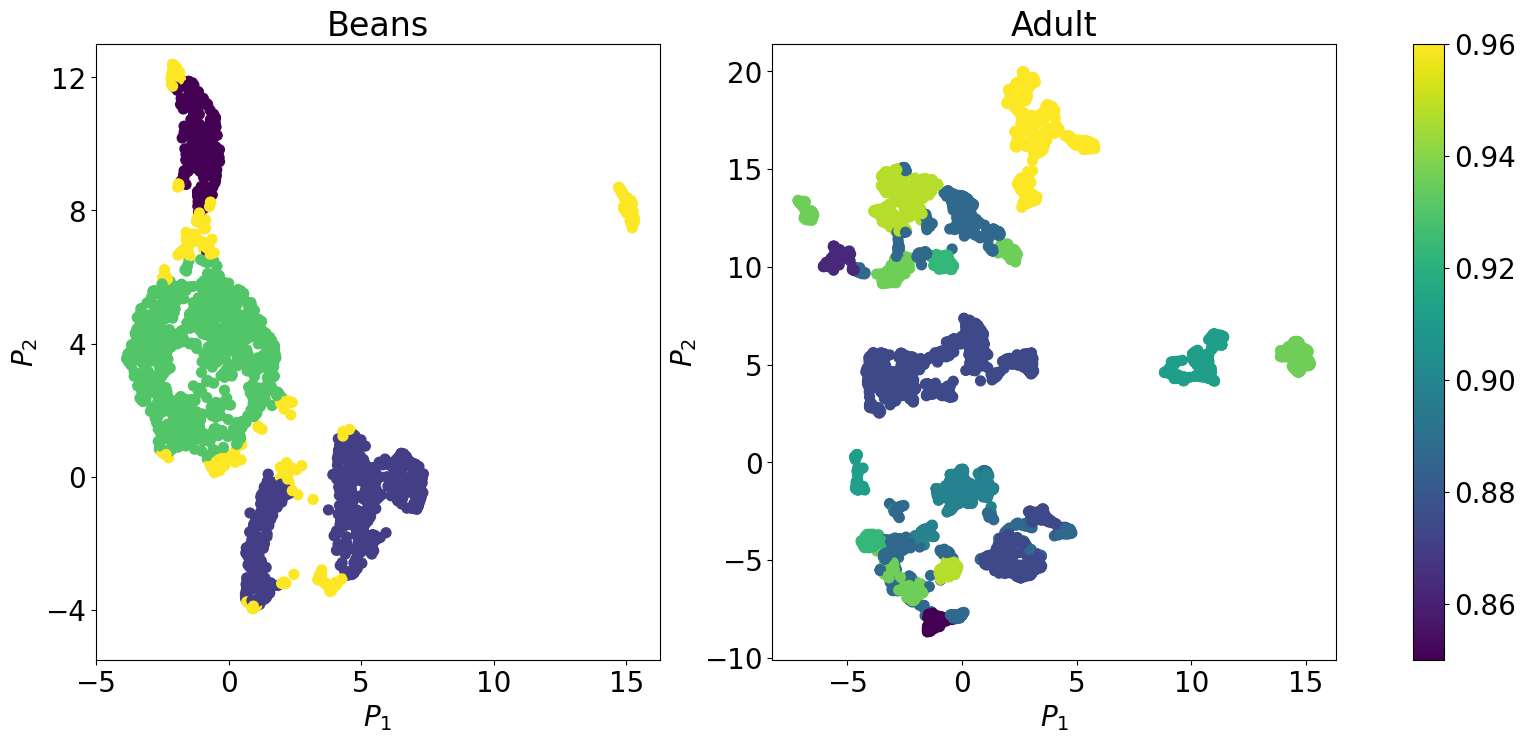

In [18]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 20

a = axes[0].scatter(X_beans[:,0], X_beans[:,1], c=col_beans, s=50)
axes[1].scatter(X_adult[:,0], X_adult[:,1], c= col_adult, s=50 )

axes[0].set_title("Beans")
axes[1].set_title("Adult")

axes[0].set_xlabel("$P_1$")
axes[0].set_ylabel("$P_2$")

axes[1].set_xlabel("$P_1$")
axes[1].set_ylabel("$P_2$")

axes[0].set_ylim(-5.5, 13)
axes[0].set_yticks([-4, 0, 4,8,12])
axes[0].set_xticks([-5, 0, 5, 10, 15])


fig.colorbar(a, ax = axes.ravel().tolist())

plt.show()

# Figure 5 : ROC

In [19]:
df_ens = pd.read_excel(os.path.join(os.getcwd(), "results_roc_auc", "ensemble_medoid_threshold.xlsx"))
df_mean = pd.read_excel(os.path.join(os.getcwd(), "results_roc_auc","mean_medoid_threshold.xlsx"))
df_ens_random = pd.read_excel(os.path.join(os.getcwd(), "results_roc_auc", "ensemble_random_threshold.xlsx"))


In [20]:
for df in [df_ens, df_mean, df_ens_random]:
           
    df["true positive"] = df["robust concordant"]#+ df["robust incorrect"]
    df["false positive"] = df["robust discordant"] 

    df["false negative"] = df["non robust concordant"] #+ df["non robust incorrect"]
    df["true negative"] = df["non robust discordant"] 

    df["positive"] = df["true positive"]+df["false negative"]
    df["negative"] = df["true negative"]+df["false positive"]

    df["TPR"] = df["true positive"]/df["positive"]
    df["FPR"] = df["false positive"]/df["negative"]


    df['acc'] = (df['true positive'] + df['true negative'])/df["len"]

    df = df.fillna(0, inplace=True)

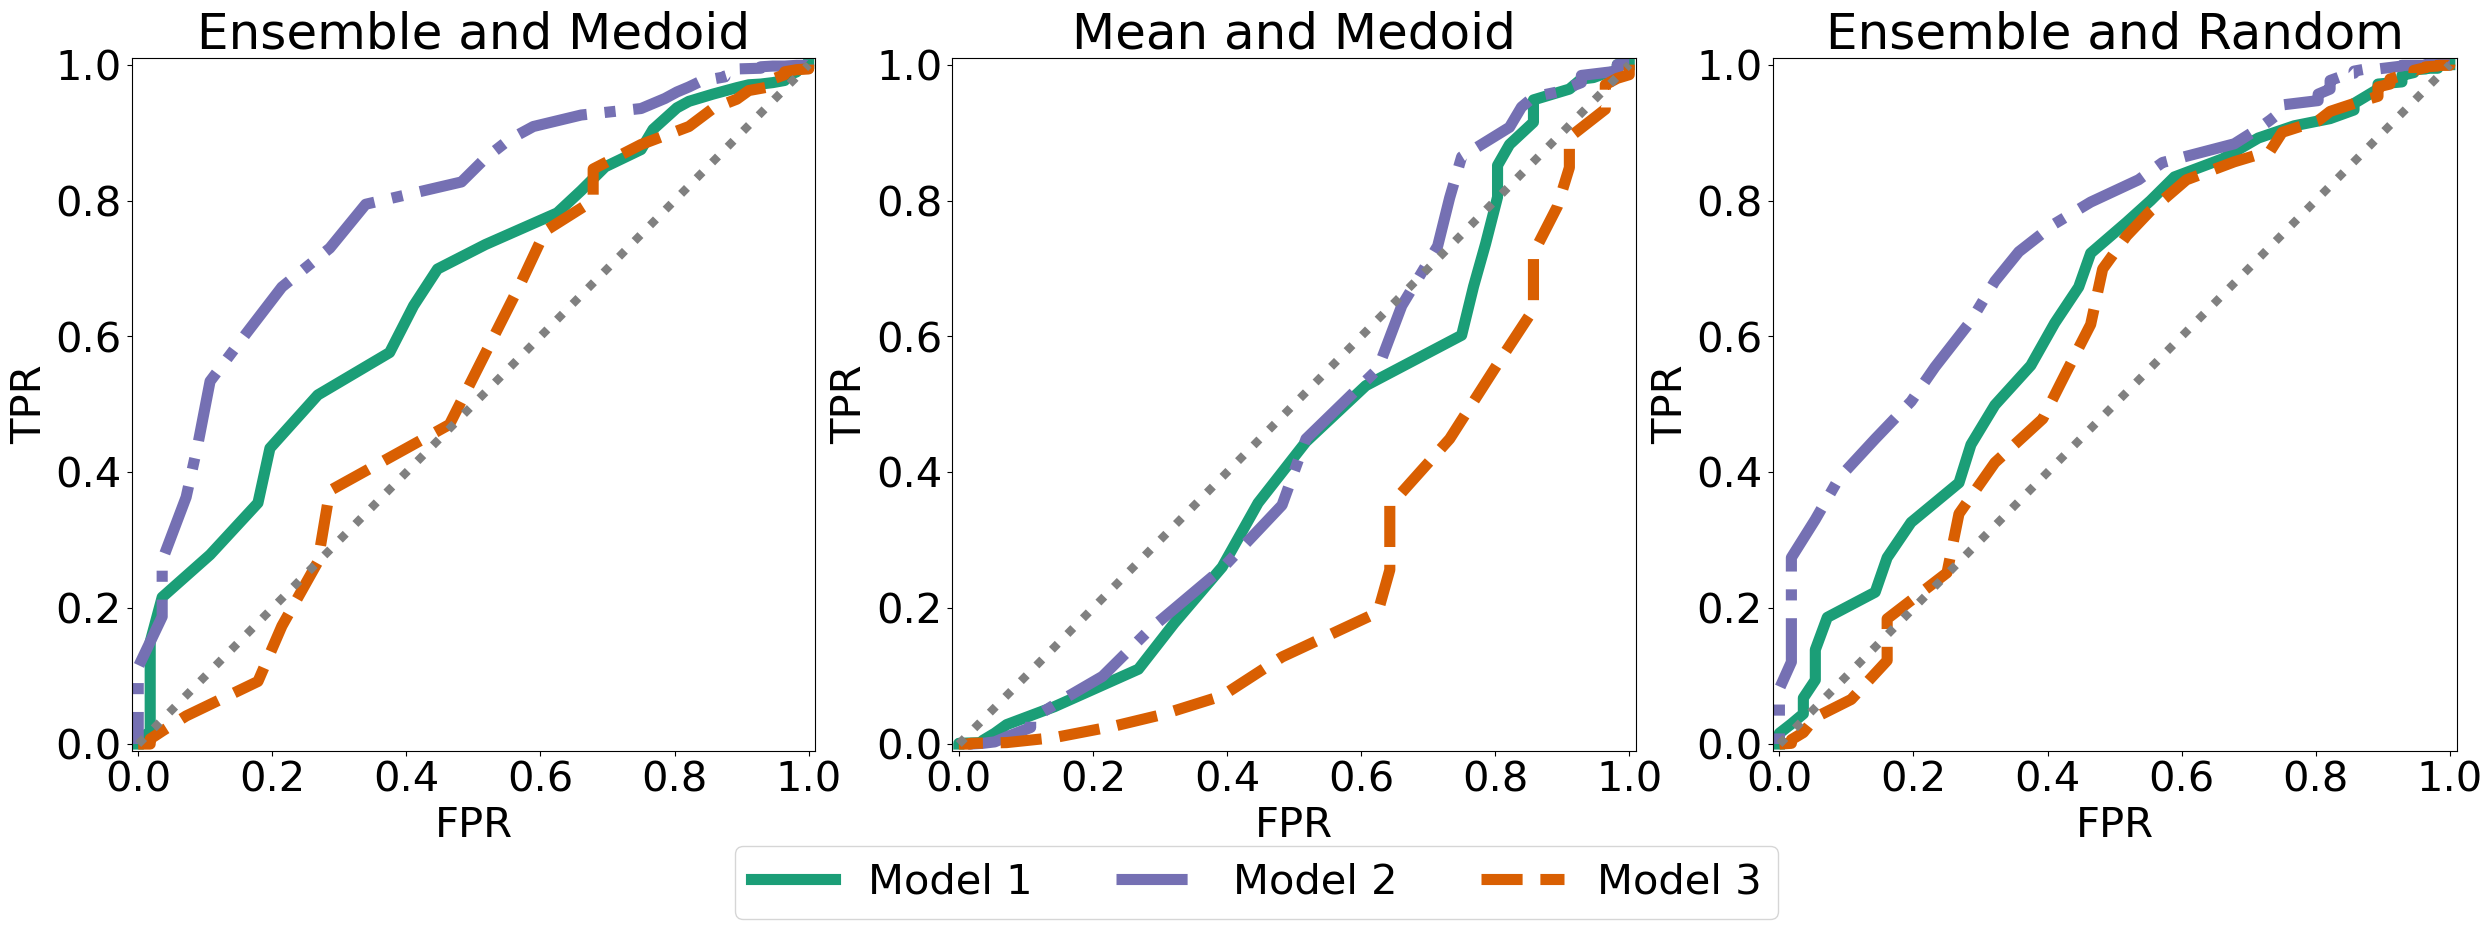

In [22]:
x_ = "FPR"
y_ = "TPR"

fig, ax = plt.subplots(1,3, figsize = (30,9))

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 30

linewidth = 8
lty = ["-", "-.", "--"]

model_colors = {"model1": "#1b9e77",  
                "model2": "#7570b3",
                "model3": "#d95f02"}


dataset_name = "bank"

for i, model_name in enumerate(model_colors.keys()):
    df1 = df_ens
    df2 = df_mean

    de = df1[df1["dataset"]==dataset_name][df1["model"]==model_name]
    dd = df2[df2["dataset"]==dataset_name][df2["model"]==model_name]

    ax[0].plot(de[x_], de[y_], label= f"Model {i+1}", c = model_colors[model_name], linewidth = linewidth, linestyle = lty[i])
    ax[1].plot(dd[x_], dd[y_],  label= f"Model {i+1}", c = model_colors[model_name], linewidth = linewidth, linestyle = lty[i])
   

for i, model_name in enumerate(model_colors.keys()):
    df1 = df_ens_random

    de = df1[df1["dataset"]==dataset_name][df1["model"]==model_name]
    ax[2].plot(de[x_], de[y_], label= f"Model {i+1}", c = model_colors[model_name], linewidth = linewidth, linestyle = lty[i])
    
    
for col in range(3):
    ax[col].set_ylim(-0.01,1.01)
    ax[col].set_xlim(-0.01,1.01)
    ax[col].set_xlabel("FPR")
    ax[col].set_ylabel("TPR")
    ax[col].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax[col].plot(np.linspace(0,1), np.linspace(0,1), ":", c= "gray", linewidth = 6)

ax[0].set_title("Ensemble and Medoid")
ax[1].set_title("Mean and Medoid")
ax[2].set_title("Ensemble and Random")

fig.legend(["Model 1", "Model 2", "Model 3"], loc='lower center', ncol=3, bbox_to_anchor=(0.5,-0.1), bbox_transform=fig.transFigure)
plt.show()